# Text Mining of Disney Billboard Top 100 songs using NLTK
The Objective of this task is to determine the words mostly used in Disney Animation Song lyrics. That have chartted on the Billboard Top 100 chart.  The 

To achieve this, we will go throught the following steps

 - import the required libraries
 - load the csv file
 - Preprocess the data
 - Text Mining
   - Text Normalization
     - Tokenization
   - Story Generation and Visualization from lyrics
     - Understanding the common words used in the lyrics: WordCloud
   - Bag-of-Words Features
   - TF-IDF
   - Word2Vec Embeddings
   - Prepare Vector for Lyrics
  
  ### Analysis
  - Frequency of words used per song (without reducing the frequencies to one)
  - Overall frequency (without reducing the frequencies to one)
  - Songs with other non-english words
      - the amount of non-english words used per songs with non-English words
      - Overall non-english words used, as a percentage of the overall frequencies
  
  ### Visualization
   - Word cloud
   - bar chart
   

In [7]:
import nltk
import pandas as pd
import numpy as np
import string
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

### Import the data and preprocess it.

In [47]:
df = pd.read_csv('disney_songs.csv', encoding='unicode_escape')

In [48]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

- The Lyrics have special characters, puntuation and numbers, which in the case, isn't really neccessary. These words were removed.

- We remove words less than 3 and STOP WORDS

## Overall Text cleaning and Analysis

### Text Normalization
We use the __nltk__ PorterStemmer() function to normalize the lyrics. We however have to tokenize the lyrics. __Tokenization__ is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

In [49]:
token_lyrics = df['Lyrics'].str.lower()\
                           .str.replace("'",'',regex=True)\
                           .apply(lambda x: x.split())
token_lyrics.head()

0    [we, dont, talk, about, bruno,, no,, no,, no, ...
1    [i, can, see, whats, happening, what, and, the...
2    [i, can, show, you, the, world, shining,, shim...
3    [the, snow, glows, white, on, the, mountain, t...
4    [you, think, you, own, whatever, land, you, la...
Name: Lyrics, dtype: object

### STOP WORDS

In [50]:
### Remove Stop Words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
print(stop_words)

{"needn't", 't', 'herself', 'any', 'couldn', 'aren', 'mightn', 'isn', 'what', 'has', 'this', 'or', "doesn't", 'after', 'on', 'didn', 'during', "isn't", 'of', "hadn't", 'ain', 'that', 'from', 'most', 'now', 'out', 'our', 'both', "that'll", 'being', 'all', 'his', 'about', 'm', "aren't", 'me', 'ourselves', 'yourselves', 'an', "she's", 'further', 'so', 'had', 'shouldn', 'no', 'to', 'then', 'other', "didn't", 'off', 'yours', 'them', 'above', 'against', 'won', 'whom', 'into', 'same', 'hasn', 'mustn', 'shan', "shouldn't", 'were', 'my', 'below', 'her', "mightn't", 'only', 'over', "should've", 'should', 'themselves', 'more', "you'd", 'some', 'can', 'd', 'myself', 'o', 'hers', 'who', "shan't", 'with', "mustn't", 'if', 'she', 'is', 'him', 'does', 'yourself', 'y', 'was', 'too', 'haven', 'the', 'ma', 'when', 'you', 'very', 'weren', 'because', 'such', 'which', "don't", 'am', 'through', "couldn't", 'where', "you'll", 'a', 'he', 'himself', "wasn't", 'and', 'ours', 'at', 'how', 'itself', 'needn', 'just

In [52]:
#Removing Stopwords
token_lyrics = token_lyrics.apply(lambda x : [w for w in x if not w in stop_words])

In [53]:
#now lets stitch these tokens back together. 
#it can easily be done using nltk's MosesDetokenizer
for i in range(len(token_lyrics)):
    token_lyrics[i] = ' '.join(token_lyrics[i])
df['clean_lyrics'] = token_lyrics

In [54]:
df.head()

,No.,Song,Movie,Year,Lyrics,Highest Rank,clean_lyrics
0,1,We Dont Talk About Bruno,Encanto,2022,"We don't talk about Bruno, no, no, no\nWe don'...",1,"dont talk bruno, no, no, dont talk bruno, wedd..."
1,2,Can You Feel the Love Tonight,The Lion King,1994,I can see what's happening\nWhat\nAnd they don...,4,see whats happening dont clue theyll fall love...
2,3,A Whole New World,Aladdin,1993,"I can show you the world\nShining, shimmering,...",1,"show world shining, shimmering, splendid tell ..."
3,4,Let It Go,Frozen,2014,The snow glows white on the mountain tonight\n...,5,snow glows white mountain tonight footprint se...
4,5,Colors of the Wind,Pocahontas,1995,You think you own whatever land you land on\nT...,4,think whatever land land earth dead thing clai...


In [55]:
df['clean_lyrics'] = df['clean_lyrics'].str.replace("([\\n:.?<_&=>0-9;,\-()\"])", " ", regex=True)
df['clean_lyrics'] = df['clean_lyrics'].apply(lambda x:" ".join([w for w in str(x).split() if len(w) > 3]))

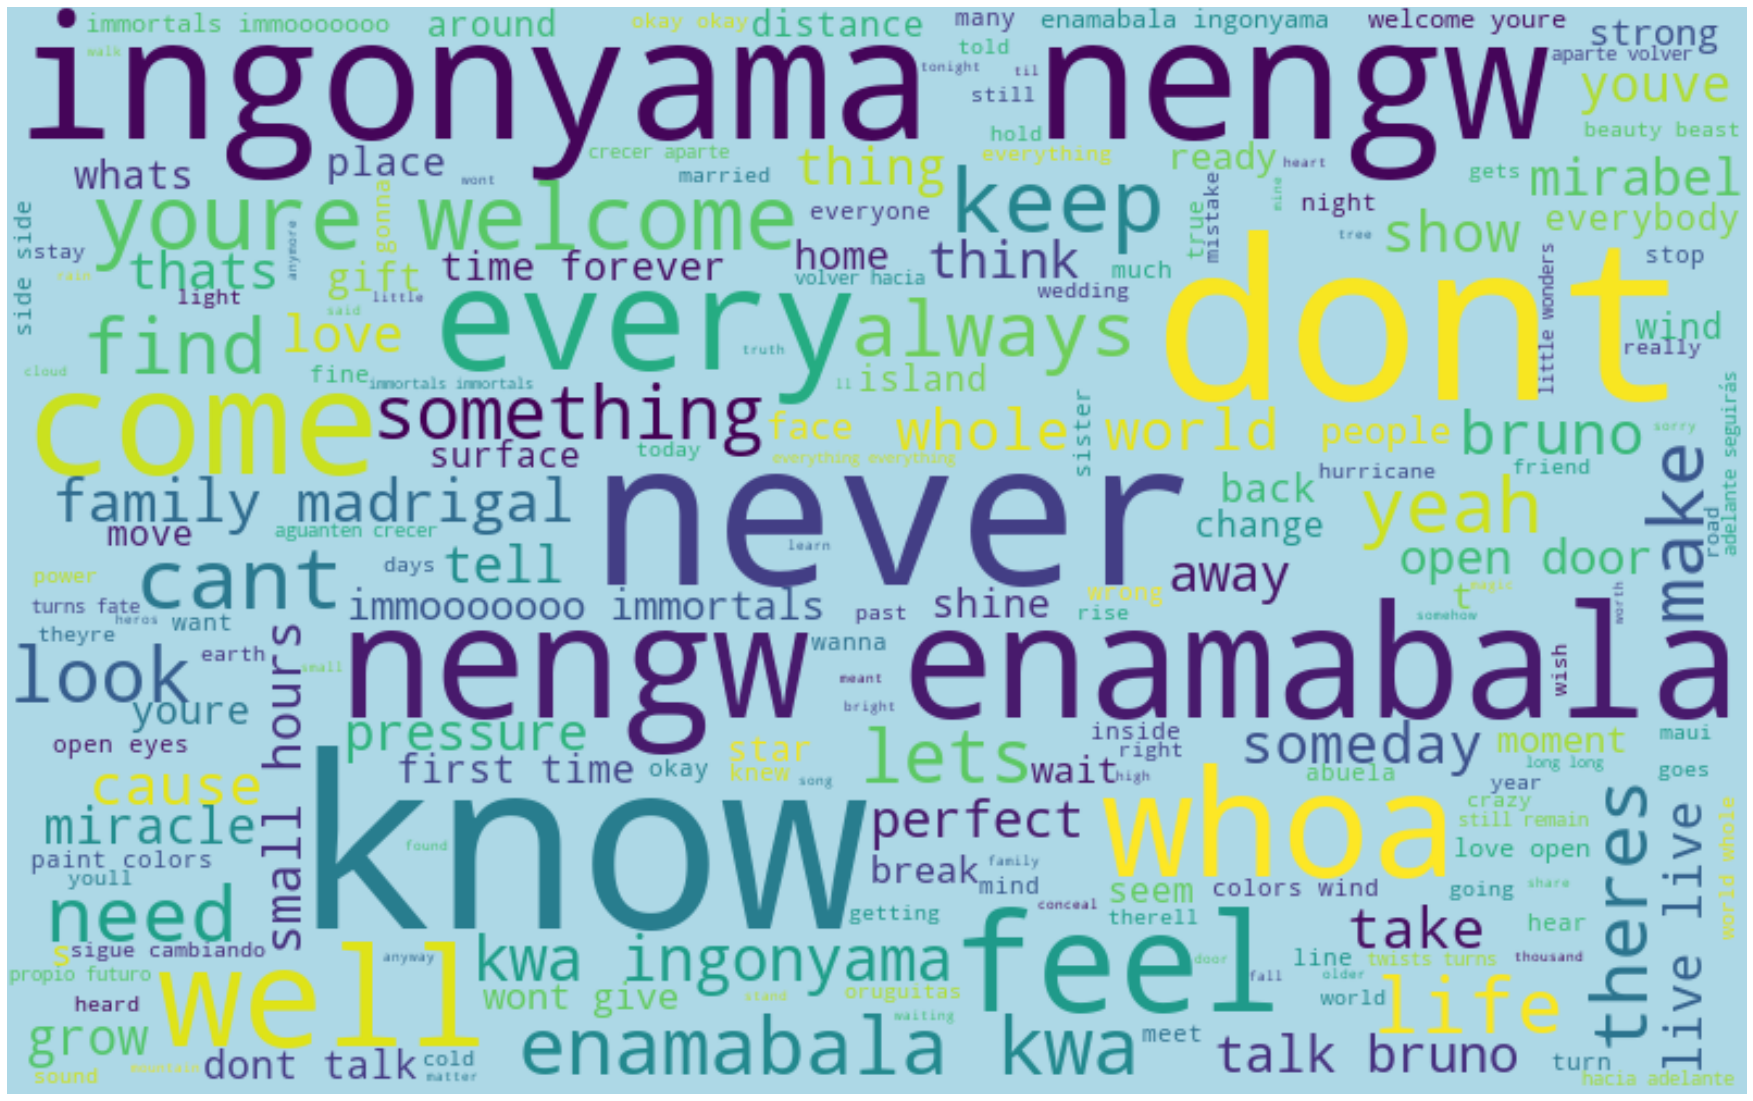

In [56]:
all_words = ' '.join([text for text in df['clean_lyrics']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110, 
                      background_color = 'lightblue').generate(all_words)
plt.figure(figsize=(40, 20)) 
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

In [60]:
lyric_freq = df['clean_lyrics'].str.split(expand=True).stack().value_counts().reset_index()
lyric_freq.columns = ['Word', 'Frequency']

In [61]:
lyric_freq["%_of_lyric"] = ((lyric_freq['Frequency']/sum(lyric_freq['Frequency']))*100).round(2)

In [64]:
lyric_freq.head(15)

,Word,Frequency,%_of_lyric
0,dont,54,1.51
1,like,48,1.34
2,know,47,1.31
3,never,40,1.12
4,youre,35,0.98
5,ingonyama,31,0.87
6,bruno,25,0.70
7,nengw,25,0.70
8,enamabala,25,0.70
9,time,25,0.70


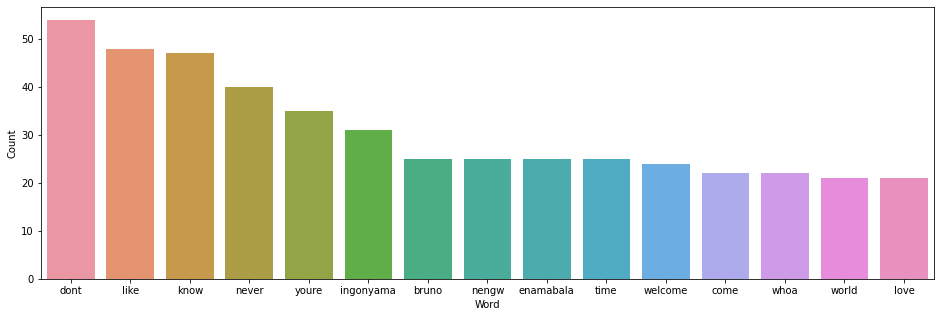

In [65]:
e = lyric_freq.nlargest(columns = "Frequency", n = 15)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Word", y="Frequency")
ax.set(ylabel = 'Count')
plt.show()

 We now want to reduce the frequency of the lyrics per song to one.

In [72]:
df['reduced_lyrics'] = df['clean_lyrics'].str.split(' ').apply(set).str.join(' ')

In [73]:
df.head()

,No.,Song,Movie,Year,Lyrics,Highest Rank,clean_lyrics,reduced_lyrics
0,1,We Dont Talk About Bruno,Encanto,2022,"We don't talk about Bruno, no, no, no\nWe don'...",1,dont talk bruno dont talk bruno wedding weddin...,bruno what like sand telling wedding rats asso...
1,2,Can You Feel the Love Tonight,The Lion King,1994,I can see what's happening\nWhat\nAnd they don...,4,whats happening dont clue theyll fall love her...,line sweet history turn happening truth heres ...
2,3,A Whole New World,Aladdin,1993,"I can show you the world\nShining, shimmering,...",1,show world shining shimmering splendid tell pr...,thrilling turn crystal tumbling world open kne...
3,4,Let It Go,Frozen,2014,The snow glows white on the mountain tonight\n...,5,snow glows white mountain tonight footprint se...,like tried rage bothered good perfect blast ri...
4,5,Colors of the Wind,Pocahontas,1995,You think you own whatever land you land on\nT...,4,think whatever land land earth dead thing clai...,corn trails stranger like rainstorm friends cl...


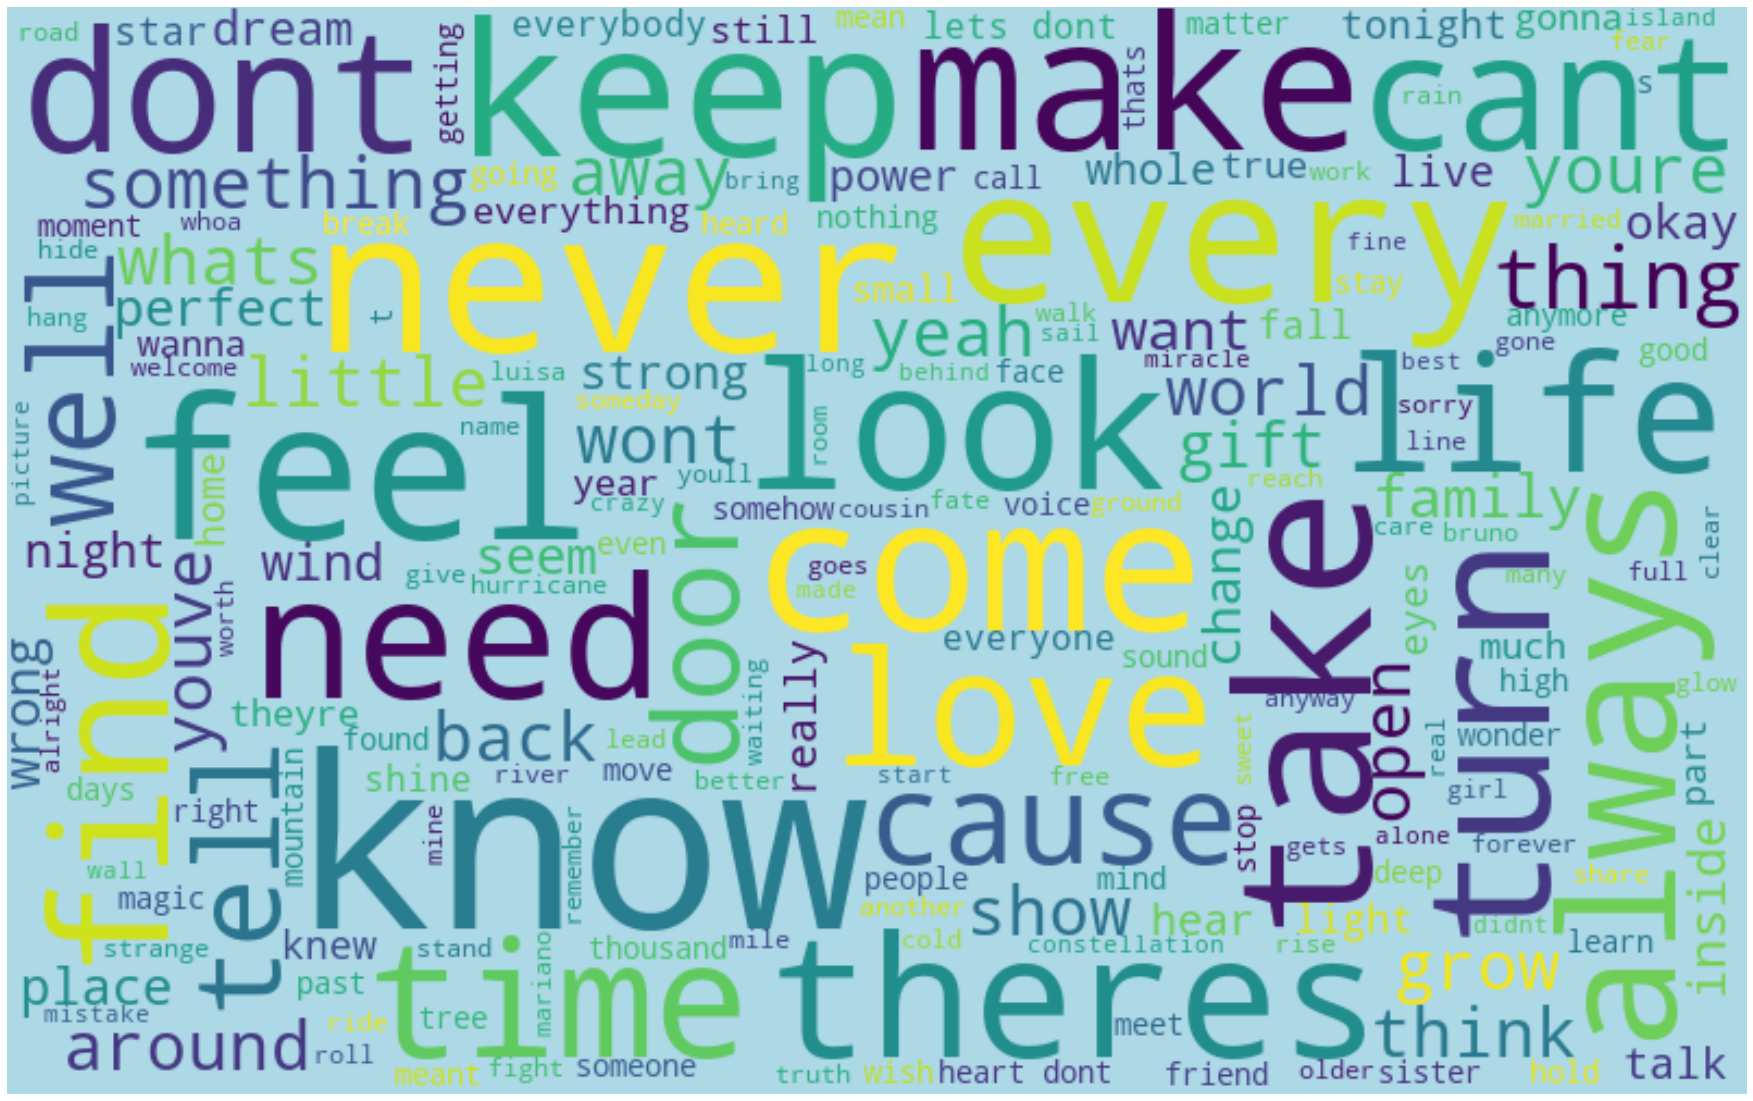

In [74]:
all_words = ' '.join([text for text in df['reduced_lyrics']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110, 
                      background_color = 'lightblue').generate(all_words)
plt.figure(figsize=(40, 20)) 
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

In [75]:
lyric_freq2 = df['reduced_lyrics'].str.split(expand=True).stack().value_counts().reset_index()
lyric_freq2.columns = ['Word2', 'Frequency2']

In [77]:
lyric_freq2["%_of_lyric2"] = ((lyric_freq2['Frequency2']/sum(lyric_freq2['Frequency2']))*100).round(2)

In [78]:
lyric_freq2.head(15)

,Word2,Frequency2,%_of_lyric2
0,dont,19,0.90
1,know,18,0.85
2,like,16,0.76
3,never,14,0.66
4,come,12,0.57
5,every,12,0.57
6,feel,11,0.52
7,take,10,0.47
8,need,10,0.47
9,make,10,0.47


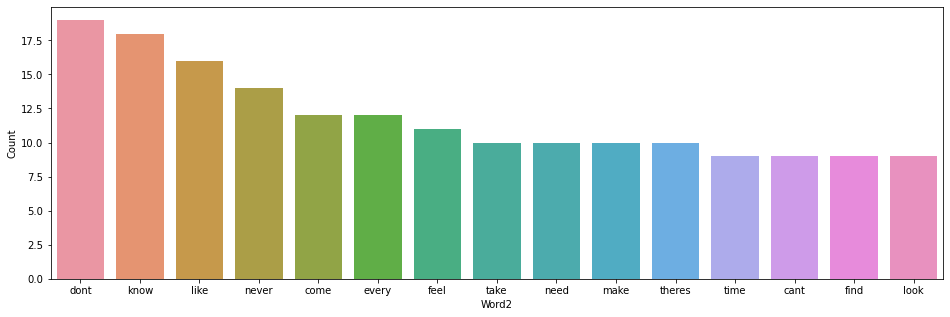

In [80]:
e = lyric_freq2.nlargest(columns = "Frequency2", n = 15)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x="Word2", y="Frequency2")
ax.set(ylabel = 'Count')
plt.show()

In [87]:
freq = lyric_freq.merge(lyric_freq2, left_on = 'Word', right_on='Word2', how='inner')
#freq = [['Word','Frequency','%_of_lyric','Frequency2','%_of_lyric2']]

In [88]:
freq.head(20)

,Word,Frequency,%_of_lyric,Word2,Frequency2,%_of_lyric2
0,dont,54,1.51,dont,19,0.90
1,like,48,1.34,like,16,0.76
2,know,47,1.31,know,18,0.85
3,never,40,1.12,never,14,0.66
4,youre,35,0.98,youre,7,0.33
5,ingonyama,31,0.87,ingonyama,1,0.05
6,bruno,25,0.70,bruno,3,0.14
7,nengw,25,0.70,nengw,1,0.05
8,enamabala,25,0.70,enamabala,1,0.05
9,time,25,0.70,time,9,0.42
